# Boston House Price prediction

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

In [2]:
# Loading Boston Dataset:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
bdf=pd.DataFrame(boston.data,columns=boston.feature_names)
bdf.head(3)
bdf['MEDV']=boston.target

In [13]:
## to find the correlation we use corr()
bdf.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


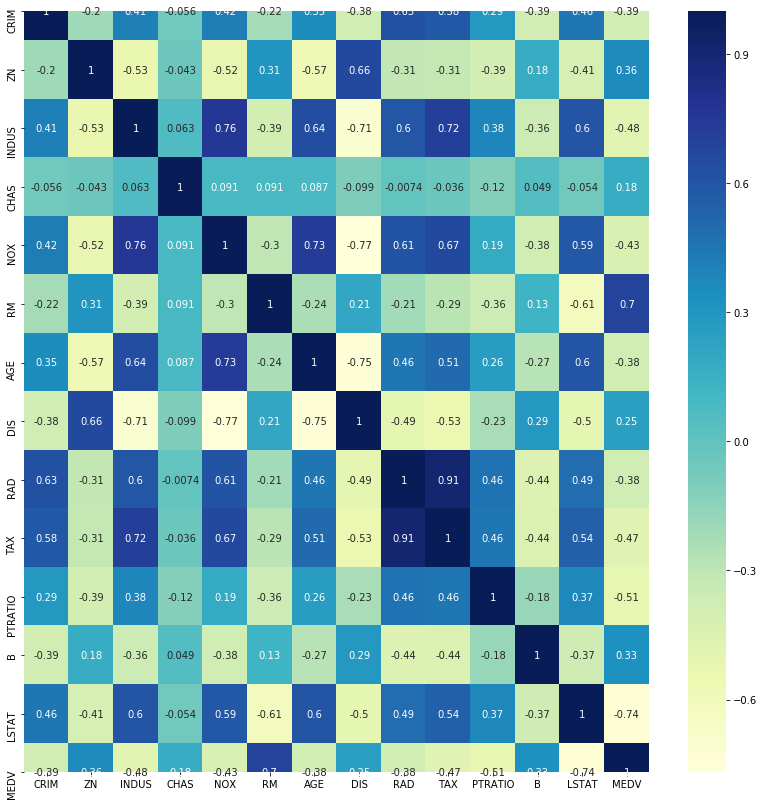

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(bdf.corr(),annot=True,cmap='YlGnBu')
plt.show()

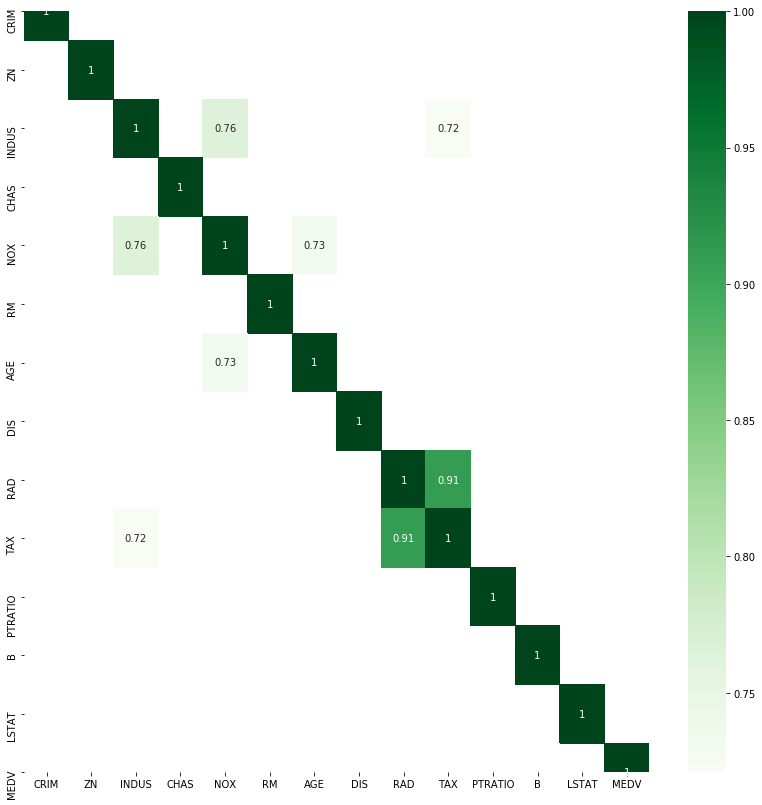

In [25]:
plt.figure(figsize=(14,14))
sns.heatmap(bdf.corr()[bdf.corr()>=0.7],annot=True,cmap='Greens')
plt.show()

In [26]:
# split the data into input and output:
X=bdf.drop(['MEDV'],axis=1)
y=bdf.MEDV

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
# build the model on Training data --> X_train and y_train
# skleanr library :import ,instantiate,fit

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Intercept and the coefficient values:
print(lm.intercept_)
lm.coef_

36.93325545711978


array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

In [39]:
# Create a dataframe for coefficientas
coeff=pd.DataFrame([X_train.columns,lm.coef_])
coeff.T

,0,1
0,CRIM,-0.117735
1,ZN,0.0440175
2,INDUS,-0.00576814
3,CHAS,2.39342
4,NOX,-15.5894
5,RM,3.76897
6,AGE,-0.00703518
7,DIS,-1.43496
8,RAD,0.240081
9,TAX,-0.0112973


In [41]:
# y=b0X0+b1X1+.........
X_train.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46


In [42]:
# checking the model predition on training data
ytrp=lm.predict(X_train)
ytrp

array([13.54334096, 21.03611757, 35.25707372, 19.31180705, 12.9193462 ,
       13.83454251, 22.66868871, 14.2409856 , 31.24023391, 25.2746277 ,
       15.13346462, 24.27169368,  9.08842615, 14.82179159, 21.01155502,
       32.97485525, 27.96169238, 25.76241079, 15.56154982, 31.08187689,
       28.10293564, 13.79628381,  7.39293584, 28.48119204, 25.40996121,
        4.34170732, 28.48040075, 17.16788093, 29.49717483, 20.3114614 ,
       15.95499192, 17.81088079, 12.68905582,  8.44914207, 19.28629969,
       34.45678405, 32.9718556 , 23.57990095, 19.63359906, 22.95623269,
       26.85871334, 21.77624643, 16.93785832, 32.00415847, 10.62790654,
       19.32739398, 32.23307479, 18.75153571, 15.81064522, 18.67130015,
       14.4104764 , 24.58123176, 24.07953473, 16.49458446, 13.19945057,
       20.38069625, 24.75377888, 17.22571167, 24.97600846, 22.55118033,
       27.83912426, 35.9434255 , 16.45240418, 11.58522008, 34.68756396,
       31.00776222, 20.65966773, 39.55056576, 29.0078266 , 29.00

In [44]:
## We need to compare the actual values(y_train) and the predicted values(y_train_pred)

from sklearn.metrics import r2_score
print('R^2 :',r2_score(y_train,ytrp))
print('Adjusted R^2',1-(1-r2_score(y_train,ytrp))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))

R^2 : 0.7697699488741149
Adjusted R^2 0.7615699744504532


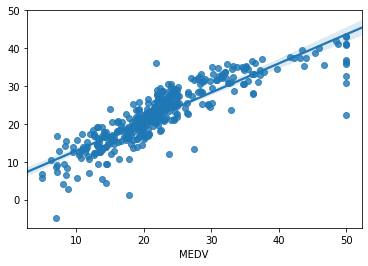

In [45]:
##regplot(y_train--> actual values and y_train_pred)
sns.regplot(y_train,ytrp)

Text(0, 0.5, 'Model predicted value')

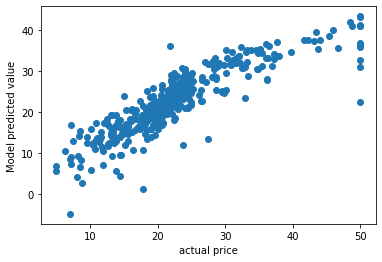

In [46]:
# visualise the differences:
plt.scatter(y_train,ytrp)
plt.xlabel("actual price")
plt.ylabel("Model predicted value")

Text(0, 0.5, 'Residuals')

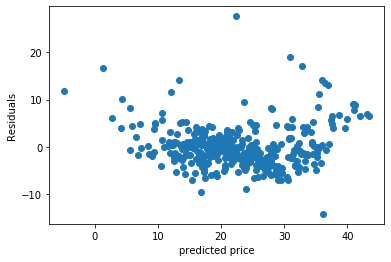

In [48]:
## plot for residuasl:

plt.scatter(ytrp,y_train-ytrp)
plt.xlabel("predicted price")
plt.ylabel("Residuals")

In [49]:
## Test the model on testing data
ytsp=lm.predict(X_test)
ytsp

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [53]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :',r2_score(y_test,ytsp))
print('Adjusted R^2',1-(1-r2_score(y_test,ytsp))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

print('MAE:',mean_absolute_error(y_test,ytsp))

print('MSE:',mean_squared_error(y_test,ytsp))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,ytsp)))

R^2 : 0.6354638433202124
Adjusted R^2 0.5935260553835997
MAE: 3.668330148135727
MSE: 29.7822450923024
RMSE:  5.457311159564058


In [54]:
# errors for training data
print('MAE:',mean_absolute_error(y_train,ytrp))

print('MSE:',mean_squared_error(y_train,ytrp))

print('RMSE: ',np.sqrt(mean_squared_error(y_train,ytrp)))

MAE: 3.1039668582990787
MSE: 19.640519427908043
RMSE:  4.431762564477935
